In [2]:
import beam_dynamics
import animate

import matplotlib.pyplot as plt
import numpy as np

In [5]:
w_d = 3**2 * np.pi**2 / 36**2 * np.sqrt(2 * 2.1e11 * 0.41 / 17000)
w_d


218.13701511766624

In [ ]:
N = 5
v = 27.78
L = 36

Mc = 42.11e3
Mb = 68.20e2
Ma = 18.13e2

Mt = Mc + 2 * Mb + 4 * Ma

ks = 5.66e5
cs = 26.24e3
g = 9.81


def harmonic_F(tau):
    return Mt * g * (1 + np.sin(218.13701511766624 * tau))

def constant_F(tau):
    return Mt * g


MCFM_beam = beam_dynamics.MCFMBeam(v=v, L=L, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=L/v, N=N, num_t=2000, P0=Mt*g , num_x=1000)
MHFM_beam = beam_dynamics.MHFMBeam(v=v, L=L, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=L/v, N=N, num_t=2000, fP=constant_F, num_x=1000)
MHFM_beam = beam_dynamics.MHFMBeam(v=v, L=L, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=L/v, N=N, num_t=2000, fP=harmonic_F), num_x=1000)
# MMM_beam = beam_dynamics.MMMBeam(v=v, L=L, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=L/v, N=N, num_t=2000, M=Mt, beta=0.25, Gamma=0.50)
# MSDMM_beam = beam_dynamics.MSDMMBeam(v=v, L=L, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=L/v, N=N, num_t=2000, Mu=2*Mb + 4*Ma, Ms=Mc, kv=4 * ks, cv=4 * cs ,beta=0.25, Gamma=0.50)
# TAVBM_beam = beam_dynamics.TAVBMBeam(v=v, L=L, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=L/v, N=N, num_t=2000, Mu=Mb + 2 * Ma, Ms=Mc, kv=2 * ks, cv=2 * cs, d=16, I=18.3e5 ,beta=0.25, Gamma=0.50)


;

''

In [22]:
import time

start_time = time.time()
w_vals_MCFM, M_vals_MCFM = MCFM_beam.calculate_midpoint_results()
print(f"Time for MCFM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")

start_time = time.time()
w_vals_MHFM, M_vals_MHFM = MHFM_beam.calculate_midpoint_results()
print(f"Time for MHFM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")

start_time = time.time()
w_vals_MMM, M_vals_MMM = MMM_beam.calculate_midpoint_results(do_moment=True)
print(f"Time for MMM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")

start_time = time.time()
w_vals_MSDMM, M_vals_MSDMM = MSDMM_beam.calculate_midpoint_results(do_moment=True)
print(f"Time for MSDMM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")

start_time = time.time()
w_vals_TAVBM, M_vals_TAVBM = TAVBM_beam.calculate_midpoint_results(do_moment=True)
print(f"Time for MMM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")



Time for MCFM_beam.calculate_midpoint_results: 0.53 seconds
Time for MHFM_beam.calculate_midpoint_results: 1.25 seconds
Time for MMM_beam.calculate_midpoint_results: 0.57 seconds
Time for MSDMM_beam.calculate_midpoint_results: 0.87 seconds
Time for MMM_beam.calculate_midpoint_results: 1.44 seconds


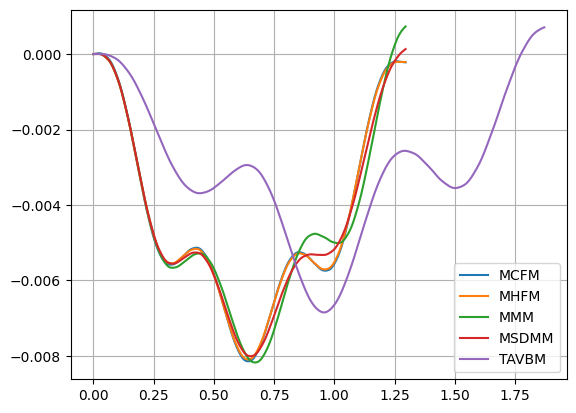

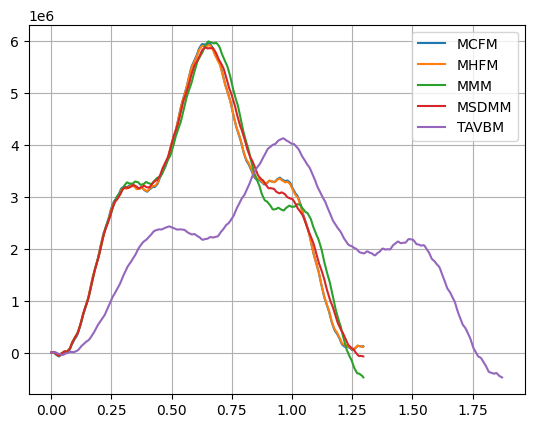

In [ ]:
plt.plot(MCFM_beam.t_vals, w_vals_MCFM, label='MCFM')
# plt.plot(MHFM_beam.t_vals, w_vals_MHFM, label='MHFM')
# plt.plot(MMM_beam.t_vals, w_vals_MMM, label='MMM')
# plt.plot(MSDMM_beam.t_vals, w_vals_MSDMM, label='MSDMM')
# plt.plot(TAVBM_beam.t_vals, w_vals_TAVBM, label='TAVBM')
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(MCFM_beam.t_vals, M_vals_MCFM, label='MCFM')
plt.plot(MHFM_beam.t_vals, M_vals_MHFM, label='MHFM')
plt.plot(MMM_beam.t_vals, M_vals_MMM, label='MMM')
plt.plot(MSDMM_beam.t_vals, M_vals_MSDMM, label='MSDMM')
plt.plot(TAVBM_beam.t_vals, M_vals_TAVBM, label='TAVBM')

plt.grid(True)
plt.legend()

In [16]:
animate.animate_beam(TAVBM_beam, w_range=(np.min(w_vals_TAVBM), np.max(w_vals_TAVBM)), M_range=(np.min(M_vals_TAVBM), np.max(M_vals_TAVBM)), trail_positions=np.array([TAVBM_beam.d]))

Computing full Newmark solution...
Solution computed.
Animation saved as TAVBM'.gif'


Computing full Newmark solution...
Solution computed.


KeyboardInterrupt: 

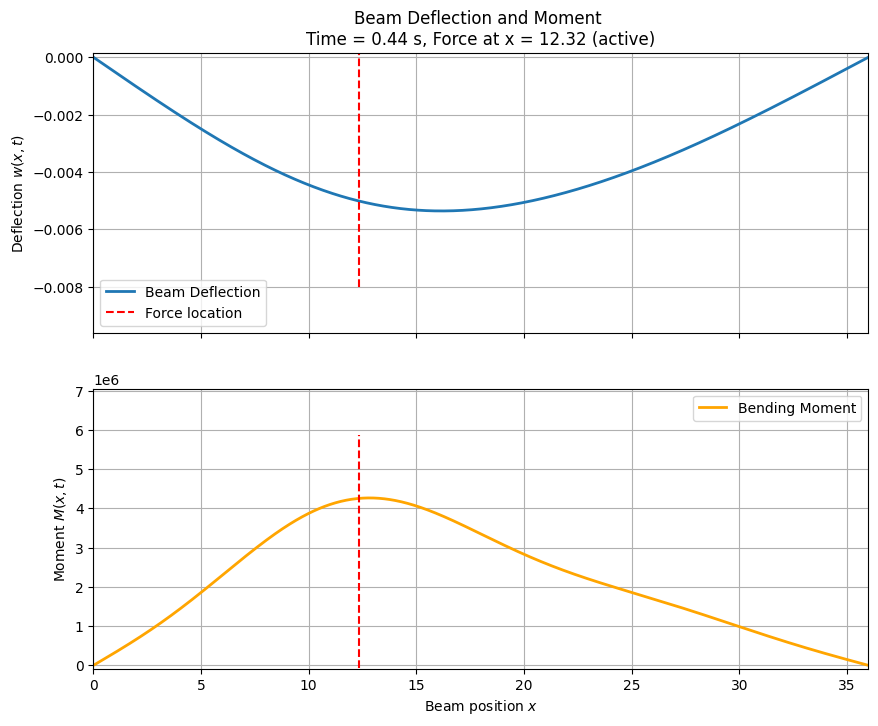

In [17]:
# animate.animate_beam(MMM_beam, w_range=(np.min(w_vals_MMM), np.max(w_vals_MMM)), M_range=(np.min(M_vals_MMM), np.max(M_vals_MMM)), trail_positions=np.array([]))
animate.animate_beam(MSDMM_beam, w_range=(np.min(w_vals_MSDMM), np.max(w_vals_MSDMM)), M_range=(np.min(M_vals_MSDMM), np.max(M_vals_MSDMM)), trail_positions=np.array([]))

In [ ]:
print("mean difference", np.mean(abs(w_vals_MMM - w_vals_MSDMM)))

mean difference 0.0002640266355353279


In [ ]:
from scipy.signal import find_peaks

def plot_fft(w_vals, t_vals, label):
    dt = t_vals[1] - t_vals[0]
    N = len(w_vals)
    f = np.fft.fftfreq(N, dt)
    W = np.fft.fft(w_vals)
    positive_frequencies = f > 0
    plt.plot(f[positive_frequencies], abs(W[positive_frequencies]), label=label)

def print_frequencies(w_vals, t_vals, label):
    dt = t_vals[1] - t_vals[0]
    N = len(w_vals)
    f = np.fft.fftfreq(N, dt)
    W = np.fft.fft(w_vals)
    positive_frequencies = f > 0

    # Find peaks in the magnitude of the FFT
    peaks, _ = find_peaks(abs(W[positive_frequencies]))
    peak_frequencies = f[positive_frequencies][peaks]
    peak_magnitudes = abs(W[positive_frequencies][peaks])

    print(f"Frequency peaks for {label}:")
    for freq, mag in zip(peak_frequencies, peak_magnitudes):
        print(f"Frequency: {freq:.2f} Hz, Magnitude: {mag:.2e}")

Frequency peaks for MCFM:
[ 2.72767103 10.9106841  24.54903923]


C:\Users\pelle\AppData\Local\Temp\ipykernel_13884\3524502255.py:2: RuntimeWarning: divide by zero encountered in log10
  print_frequencies(np.log10(w_vals_MCFM), MCFM_beam.t_vals, 'MCFM')
C:\Users\pelle\AppData\Local\Temp\ipykernel_13884\3524502255.py:2: RuntimeWarning: invalid value encountered in log10
  print_frequencies(np.log10(w_vals_MCFM), MCFM_beam.t_vals, 'MCFM')


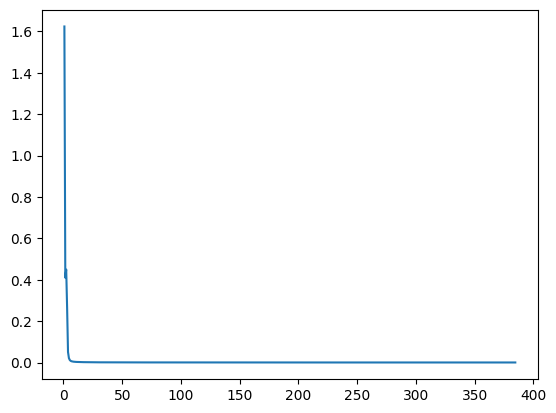

In [ ]:
plot_fft(w_vals_MCFM, MCFM_beam.t_vals, 'MCFM')
print_frequencies(np.log10(w_vals_MCFM), MCFM_beam.t_vals, 'MCFM')
print(MCFM_beam.get_omega_n(np.arange(1, N+1)) / 2 / np.pi)

Frequency peaks for MMM:
Frequency: 2.31 Hz, Magnitude: 5.56e-01
Frequency: 10.02 Hz, Magnitude: 1.10e-02
Frequency: 23.13 Hz, Magnitude: 4.46e-03
[ 2.72767103 10.9106841  24.54903923]


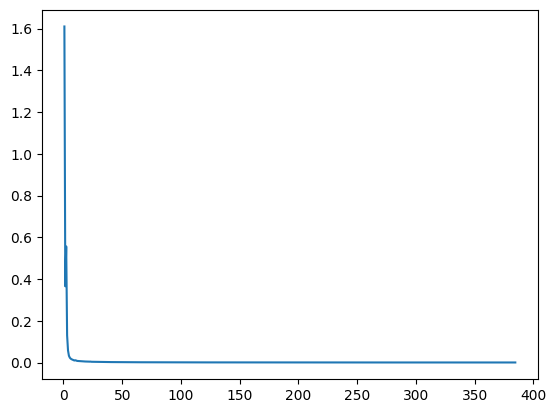

In [ ]:
plot_fft(w_vals_MMM, MMM_beam.t_vals, 'MMM')
print_frequencies(w_vals_MMM, MMM_beam.t_vals, 'MMM')
print(MMM_beam.get_omega_n(np.arange(1, N+1)) / 2 / np.pi)

In [ ]:
210 + 40*21

1050